# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
u[1,:]

array([-0.87264432,  0.48835631])

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u, s, vh = svd(A)
    m,n = A.shape
    aux=sum( s[i]*np.outer(u[:,i],vh[i,:]) for i in range(min(n,m)) )
    return np.allclose(aux,A)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

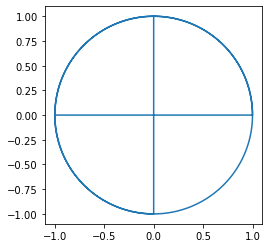

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


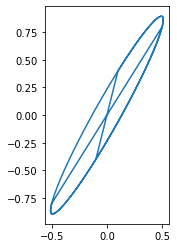

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

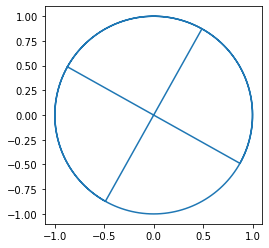

In [11]:
show_circle(u @ circle)

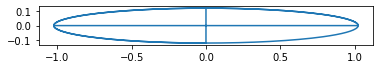

In [12]:
show_circle(np.diag(s)  @ circle)

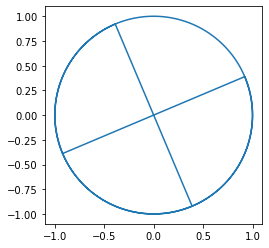

In [13]:
show_circle(vh  @ circle)

__Respuesta:__ Que **U** y **V** sean unitarias implica que al aplicarlas como operador solo generan rotaciones.

__Respuesta:__ si aplicamos directamente A obtendremos el mismo resultado. Podemos notar que si aplicamos U luego S y luego Vh obtendremos el mismo resultado que aplicar directamente A

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

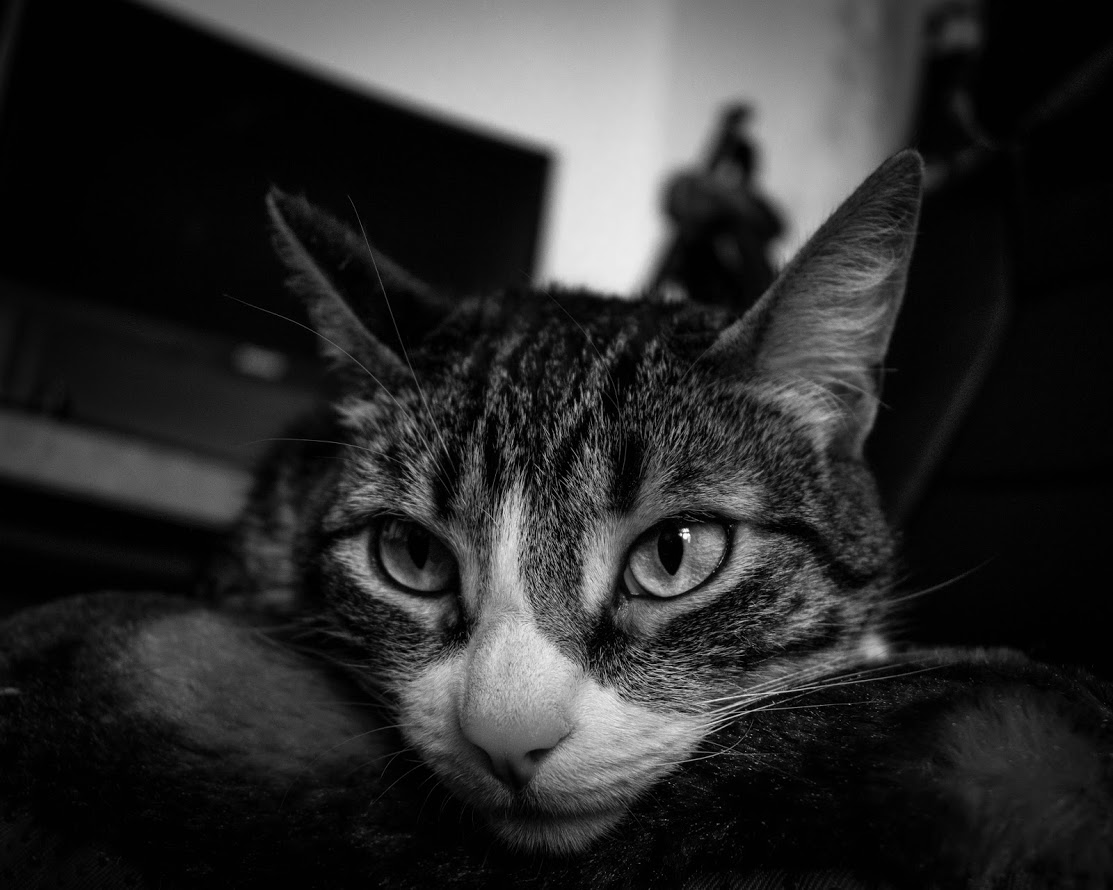

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
def low_rank_svd_approximation(A, l):
    if(l <= np.linalg.matrix_rank(A)):
        u,s,vh = np.linalg.svd(A)
        aux=sum( s[i]*np.outer(u[:,i],vh[i,:]) for i in range(l))
        print(np.linalg.norm(A-aux,'fro'))
        return aux

    

16045.719758452416


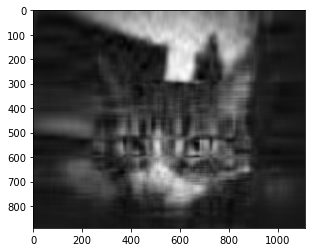

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

8144.192597479766


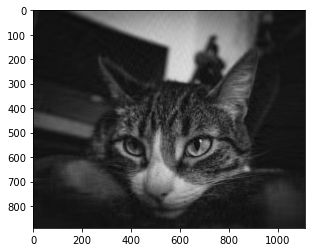

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [20]:
def low_rank_svd_tol_approximation(A, tol):
    u,s,vh = np.linalg.svd(A)
    total = sum(s)
    r = np.linalg.matrix_rank(A)
    for l in range(r,-1,-1):
        aux = np.sqrt((sum (s[i]**2 for i in range(l,r)))/total)
        if(aux <= tol):
            l_tol = l  
        else:
            print(f"l_tol es {l_tol}")
            break
    
    return sum( s[i]*np.outer(u[:,i],vh[i,:]) for i in range(l_tol))


    

l_tol es 792


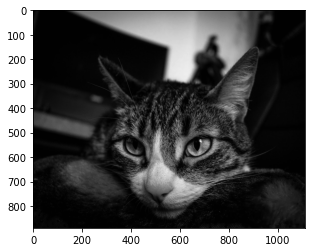

In [21]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

l_tol es 884


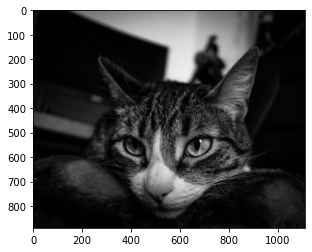

In [22]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

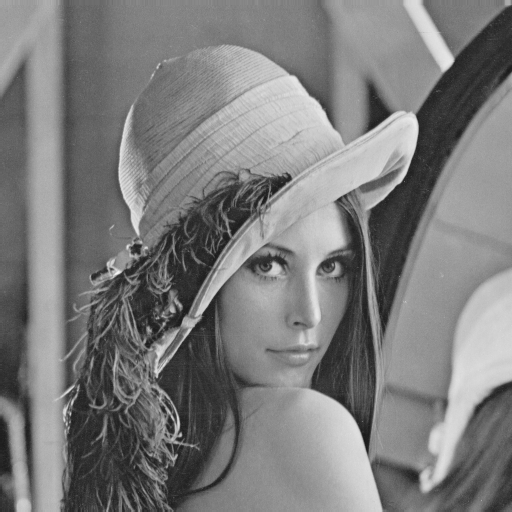

In [23]:
your_img_name = "Lenna.png"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [24]:
your_img_np = np.array(your_img)

9884.65208613137


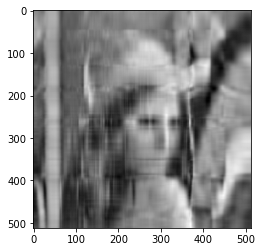

In [25]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

7090.102537289246


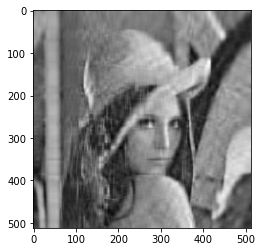

In [26]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

l_tol es 459


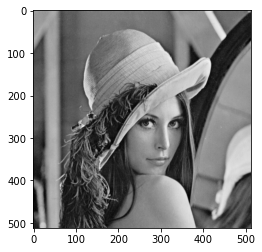

In [27]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

l_tol es 498


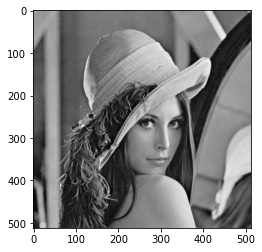

In [28]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Yo creo que hay otras maneras mas utiles, con metodos menos costosos que la descomposcion svd, pues mediante este metodo obtener la imagen sin perdida de informacion puede ser bien costoso.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [29]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [30]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-09-25,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8134.0,8332.0,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,3909.9
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,27.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,63.0,67.0,67.0,70.0,70.0,70.0,70.0,70.0,71.0,2823.1
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,34.0,37.0,36.0,36.0,40.0,43.0,43.0,43.0,NaN


In [31]:
start_date = pd.to_datetime("2020-10-01", format='%Y-%m-%d')
end_date = pd.to_datetime("2020-10-11", format='%Y-%m-%d')
indices=list(covid_comunas)

In [32]:
covid_tasa_promedio_nuevos = (
    covid_comunas.dropna(subset=["codigo_comuna"])
    .fillna(0)
    .melt(id_vars=indices[0:5], value_vars= indices[5:len(indices)-1],var_name='fechas', value_name='casos_totales')
)

covid_tasa_promedio_nuevos["fechas"] = pd.to_datetime(covid_tasa_promedio_nuevos["fechas"], format='%Y-%m-%d')


def diferencia(s):
    aux=[0]
    indices=s.index
    for x in range(1,len(indices)):

        aux.append(s[indices[x]]-s[indices[x-1]])
    return aux
        
covid_tasa_promedio_nuevos = (
    covid_tasa_promedio_nuevos.sort_values("fechas")
    .assign(casos_nuevos=lambda df: df.groupby("comuna")["casos_totales"].transform(lambda s: diferencia(s)))
    .loc[lambda df: (df["fechas"] >= start_date) & (df["fechas"]<=end_date)]
    .groupby(["region","comuna"]).agg(prom_casos_nuevos=("casos_nuevos","mean"))
    .assign(poblacion=covid_comunas.dropna(subset=["codigo_comuna"]).groupby(["region","comuna"]).agg(poblacion=("poblacion","mean")))
    .assign(tasa_prom_casos_nuevos=lambda df: df.groupby(["region","comuna"])[["prom_casos_nuevos","poblacion"]]
            .apply(lambda s: 100000*s["prom_casos_nuevos"][0]/s["poblacion"][0]))
    .sort_values(by='tasa_prom_casos_nuevos', ascending=False)
 
)



covid_tasa_promedio_nuevos


prom_casos_nuevos  poblacion  \
region     comuna                                         
Magallanes Timaukel                 3.333333      282.0   
           San Gregorio             4.000000      681.0   
           Laguna Blanca            1.333333      264.0   
           Porvenir                34.333333     7323.0   
           Punta Arenas           631.333333   141984.0   
...                                      ...        ...   
Aysén      OHiggins                 0.000000      661.0   
Coquimbo   Rio Hurtado              0.000000     4372.0   
Aysén      Cochrane                 0.000000     3685.0   
Magallanes Antartica                0.000000      137.0   
Valparaíso Juan Fernandez          -0.333333     1033.0   

                           tasa_prom_casos_nuevos  
region     comuna                                  
Magallanes Timaukel                   1182.033097  
           San Gregorio                587.371512  
           Laguna Blanca               505.050505  
           Porvenir                    468.842460  
           Punta Arenas                444.651040  
...                                           ...  
Aysén      OHiggins                      0.000000  
Coquimbo   Rio Hurtado                   0.000000  
Aysén      Cochrane                      0.000000  
Magallanes Antartica                     0.000000  
Valparaíso Juan Fernandez              -32.268474  

[346 rows x 3 columns]

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Son comunas con pocos habitantes, por lo que aunque no hayan tantos contagiados a nivel pais provenientes de esas comunas la tasa es alta. Podemos notar que Punta Arenas tiene una tasa mas baja que Timaukel pero Punta arenas tiene en promedio 631 casos nuevos, mientras que Timaukel solo 3.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [33]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,822,732,745,949,367,728,794,738,737,832
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,957,638,811,1104,907,648,972,932,1046,1044
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1970,2217,3547,2605,989,1229,1571,1890,2239,3825
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,673,960,861,687,388,319,792,838,1020,939
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1151,1200,1024,1626,610,823,1008,1128,1057,1026


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [34]:
covid_pcr_melt =(
    covid_pcr.melt(id_vars=["region"], value_vars=list(covid_pcr)[3:len(list(covid_pcr))],var_name='fechas', value_name='nm_pcr')
    .fillna(0)
)

covid_pcr_melt["fechas"] = pd.to_datetime(covid_pcr_melt["fechas"], format='%Y-%m-%d')

    

covid_pcr_melt.head()

,region,fechas,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [35]:
covid_casos_melt = (
    covid_comunas.melt(id_vars=["region"], value_vars=list(covid_comunas)[5:len(list(covid_comunas))-1],var_name='fechas', value_name='casos_totales')
    .fillna(0)
)

covid_casos_melt["fechas"] = pd.to_datetime(covid_pcr_melt["fechas"], format='%Y-%m-%d')

    

covid_casos_melt.head()

,region,fechas,casos_totales
0,Arica y Parinacota,2020-04-09,6.0
1,Arica y Parinacota,2020-04-09,0.0
2,Arica y Parinacota,2020-04-09,0.0
3,Arica y Parinacota,2020-04-09,0.0
4,Arica y Parinacota,2020-04-09,0.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [36]:
covid_corr_casos_pcr = (
    covid_pcr_melt.merge(covid_casos_melt, how='outer',on=["region","fechas"])    
)

covid_corr_casos_pcr["nm_pcr"]=covid_corr_casos_pcr["nm_pcr"].fillna(0)
covid_corr_casos_pcr["casos_totales"]=covid_corr_casos_pcr["casos_totales"].ffill()

covid_corr_casos_pcr=covid_corr_casos_pcr.groupby("region").apply(lambda ds: ds["nm_pcr"].corr(ds["casos_totales"]))

covid_corr_casos_pcr.sort_values(ascending=True)

region
Metropolitana        -0.330640
Tarapacá             -0.251368
Biobío               -0.197247
Maule                -0.179419
Arica y Parinacota   -0.173157
Antofagasta          -0.167975
Coquimbo             -0.162596
Valparaíso           -0.156051
Araucanía            -0.151678
Atacama              -0.147878
Los Ríos             -0.141778
Ñuble                -0.136288
O’Higgins            -0.107629
Los Lagos            -0.093464
Magallanes           -0.079653
Aysén                 0.051426
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Parece coincidir con el sentido comun, pues al aumentar el numero de examenes PCR, hay mas control sobre los contagiados y se esperaria que los casos nuevos disminuyan. En el caso contrario si se hacen pocos examenes PCR, al no tener control sobre quien está contagiado estos individuos pueden ser focos de contagio y aumentar los casos nuevos.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Cual ha sido el mes mas letal desde marzo hasta octubre?

In [37]:
covid_fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_fallecidos.head()

,region,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,...,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,166,168,170,172,173,174,175,175,176,176
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,239,239,239,239,239,240,240,241,242,242
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,518,520,521,521,521,522,524,525,528,530
3,Atacama,0,0,0,0,0,0,0,0,0,...,79,81,81,81,81,83,84,84,84,84
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,233,236,237,237,237,238,238,239,239,240


In [39]:
#Esta funcion es parecida a la funcion diferencia definida antes, solo que aqui la priera toma de datos no es 0, si no el valor de ese dia.

def diferencia_diaria(s):
    aux=[]
    indices=s.index
    for x in range(0,len(indices)):
        if(x==0):
            aux.append(s[indices[x]])      
        else:
            aux.append(s[indices[x]]-s[indices[x-1]])
    return aux

#crearemos el dataframe covid_fallecidos_mes que tendrá las columnas fechas y Fallecidos_mes donde las fechas seran mensuales

covid_fallecidos_mes = (
    covid_fallecidos.melt(id_vars=["region"], value_vars=list(covid_fallecidos)[1:],var_name='fechas', value_name='Fallecidos_acumulados')
    .assign(Fallecidos_mes=lambda df: df.groupby("region")["Fallecidos_acumulados"].transform(lambda s: diferencia_diaria(s)))
)


covid_fallecidos_mes["fechas"] = pd.to_datetime(covid_fallecidos_mes["fechas"], format='%Y-%m-%d')
covid_fallecidos_mes= covid_fallecidos_mes.loc[lambda df: df["region"] != "Total"]


#En las siguientes lineas filtraremos las fechas a solo meses y sumaremos todos los datos de ese grupo (sumaremos todos los datos del mes)

meses = covid_fallecidos_mes.fechas.dt.to_period("M")
covid_fallecidos_mes =  covid_fallecidos_mes.groupby(meses).sum().reset_index().drop("Fallecidos_acumulados",axis=1)

covid_fallecidos_mes

,fechas,Fallecidos_mes
0,2020-03,12.0
1,2020-04,215.0
2,2020-05,827.0
3,2020-06,4634.0
4,2020-07,3768.0
5,2020-08,1832.0
6,2020-09,1452.0
7,2020-10,1262.0


In [40]:
#de manera parecida a la anterior crearemos el dataframe covid_comunas_mes con las columnas fechas y casos_mes donde las fechas son mensuales. 

covid_comunas_mes = (
    covid_comunas.fillna(0)
    .melt(id_vars=["region","comuna"], value_vars=list(covid_comunas)[5:len(list(covid_comunas))-1], var_name='fechas', value_name='casos_totales')
    .assign(casos_mes=lambda df: df.groupby("comuna")["casos_totales"].transform(lambda s: diferencia_diaria(s)))
)


covid_comunas_mes["fechas"] = pd.to_datetime(covid_comunas_mes["fechas"], format='%Y-%m-%d')
covid_comunas_mes= covid_comunas_mes.loc[lambda df: df["region"] != "Total"]

#en las siguientes lineas filtramos los meses.

meses = covid_comunas_mes.fechas.dt.to_period("M")
covid_comunas_mes = covid_comunas_mes.groupby(meses).sum().reset_index().drop("casos_totales",axis=1)

covid_comunas_mes



,fechas,casos_mes
0,2020-03,1937.0
1,2020-04,11767.0
2,2020-05,76901.0
3,2020-06,210275.0
4,2020-07,94308.0
5,2020-08,66984.0
6,2020-09,57738.0
7,2020-10,47612.0


In [45]:
#aqui unimos las dos tablas con las fechas como llave
covid_letalidad_mes = ( 
    covid_fallecidos_mes.merge(covid_comunas_mes, how="outer",on="fechas")
)

#aqui agregamos la columna letalidad

covid_letalidad_mes["Letalidad"] = 100*covid_fallecidos_mes["Fallecidos_mes"]/covid_letalidad_mes["casos_mes"]
#Opté por hacerlo de esta forma porque el assign con apply no me funcionó
covid_letalidad_mes.sort_values(by="Letalidad", ascending=False)

,fechas,Fallecidos_mes,casos_mes,Letalidad
4,2020-07,3768.0,94308.0,3.995419
5,2020-08,1832.0,66984.0,2.734981
7,2020-10,1262.0,47612.0,2.650592
6,2020-09,1452.0,57738.0,2.514808
3,2020-06,4634.0,210275.0,2.203781
1,2020-04,215.0,11767.0,1.827144
2,2020-05,827.0,76901.0,1.075409
0,2020-03,12.0,1937.0,0.619515


__Respuesta:__ Mediante el dataframe **covid_letalidad_mes** podemos notar que el mes de Julio fue el mas letal

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿En que region ha sido mas letal el virus covid19?


In [42]:
indices=list(covid_comunas)
covid_comunas_reg = (
    covid_comunas.dropna(subset=["codigo_comuna"])
    .fillna(0)
    .melt(id_vars=indices[0:5], value_vars= indices[5:len(indices)-1],var_name='fechas', value_name='casos_acumulados')
    .assign(casos_diarios=lambda df: df.groupby("comuna")["casos_acumulados"].transform(lambda s: diferencia_diaria(s)))
    .groupby("region").agg(casos_totales_region=("casos_diarios","sum"))

)

covid_comunas_reg

,casos_totales_region
region,
Antofagasta,21840.0
Araucanía,11452.0
Arica y Parinacota,9842.0
Atacama,7764.0
Aysén,1032.0
Biobío,32762.0
Coquimbo,14442.0
Los Lagos,14261.0
Los Ríos,3204.0


In [43]:
covid_fallecidos_reg = (
    covid_fallecidos.melt(id_vars="region", value_vars= list(covid_fallecidos)[1:],var_name='fechas', value_name='fallecidos_acumulados')
    .assign(fallecidos_diarios=lambda df: df.groupby("region")["fallecidos_acumulados"].transform(lambda s: diferencia_diaria(s)))
    .loc[lambda df: df["region"] != "Total"]
    .groupby("region").agg(fallecidos_totales_region=("fallecidos_diarios","sum"))

)

covid_fallecidos_reg

,fallecidos_totales_region
region,
Antofagasta,530.0
Araucanía,144.0
Arica y Parinacota,176.0
Atacama,84.0
Aysén,3.0
Biobío,454.0
Coquimbo,240.0
Los Lagos,123.0
Los Ríos,31.0


In [44]:
covid_letalidad_reg = ( 
    covid_fallecidos_reg.merge(covid_comunas_reg, how="outer",on="region")
)

covid_letalidad_reg["Letalidad"] = 100*covid_letalidad_reg["fallecidos_totales_region"]/covid_letalidad_reg["casos_totales_region"]
#Opté por hacerlo de esta forma porque el assign con apply no me funcionó
covid_letalidad_reg.sort_values(by="Letalidad", ascending=False)

,fallecidos_totales_region,casos_totales_region,Letalidad
region,,,
Metropolitana,9774.0,315814.0,3.094860
Valparaíso,1036.0,41872.0,2.474207
Antofagasta,530.0,21840.0,2.426740
O’Higgins,490.0,22735.0,2.155267
Maule,403.0,19161.0,2.103231
Tarapacá,242.0,13386.0,1.807859
Arica y Parinacota,176.0,9842.0,1.788254
Coquimbo,240.0,14442.0,1.661820
Ñuble,146.0,9532.0,1.531683


__Respuesta:__ Luego la región con mayor indice de letalidad es la metropolitana